In [1]:
import pandas as pd
police_killings = pd.read_csv('police_killings.csv', encoding = 'ISO-8859-1')

police_killings.head()
print(police_killings)

                        name      age  gender    raceethnicity     month  day  \
0         A'donte Washington       16    Male            Black  February   23   
1             Aaron Rutledge       27    Male            White     April    2   
2                Aaron Siler       26    Male            White     March   14   
3               Aaron Valdez       25    Male  Hispanic/Latino     March   11   
4               Adam Jovicic       29    Male            White     March   19   
5              Adam Reinhart       29    Male            White     March    7   
6           Adrian Hernandez       22    Male  Hispanic/Latino     March   27   
7               Adrian Solis       35    Male  Hispanic/Latino     March   26   
8              Alan Alverson       44    Male            White   January   28   
9                 Alan James       31    Male            White  February    7   
10          Albert Hanson Jr       76    Male            White     April   26   
11            Alec Ouzounian

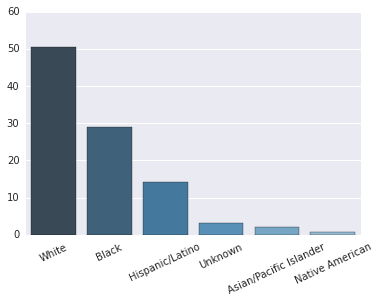

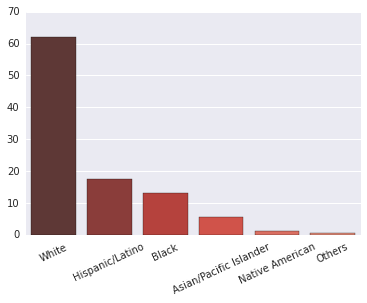

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

race_counts = police_killings['raceethnicity'].value_counts() 
race_ratio = race_counts / race_counts.sum() * 100
sns.barplot(x = race_ratio.index, y = race_ratio, palette = 'Blues_d') #return a axes object
plt.xticks(rotation = 25)
plt.show()
#Comparison to the percentage of each race in the US population 
#data from US census http://quickfacts.census.gov/qfd/states/00000.html

pop = {'White': 62.1, 'Hispanic/Latino': 17.4, 'Black': 13.2, 'Asian/Pacific Islander':5.6, 'Native American': 1.2, 'Others': 0.5}
order = ['White', 'Hispanic/Latino', 'Black', 'Asian/Pacific Islander', 'Native American', 'Others']
# http://stackoverflow.com/questions/16228248/python-simplest-way-to-get-list-of-values-from-dict
sns.barplot(x = list(pop.keys()), y = list(pop.values()), order = order,palette = "Reds_d")
plt.xticks(rotation = 25)
plt.show()


count      465.000000
mean     24308.965591
std       9021.772844
min       5457.000000
25%      18257.000000
50%      22348.000000
75%      28556.000000
max      86023.000000
Name: p_income, dtype: float64

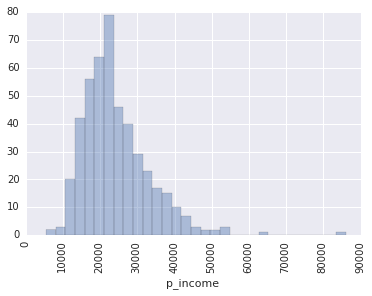

In [3]:
#p_income = median personal income
income = police_killings[police_killings['p_income'] != '-']['p_income']
income = income.astype(float)

sns.distplot(income, kde = False)
plt.xticks(rotation = 90)

income.describe()

Median Salary of pop above 15: 24071
Median Salary of pop above 25: 32140

In [5]:
state_pop = pd.read_csv('state_population.csv')

counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({'STATE': counts.index, 'shootings' : counts})

# ex: http://www.datacarpentry.org/python-ecology/04-merging-data

states = states.merge(state_pop, on = "STATE")

states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']


# Top 5 states that have the most police killings rate
states.sort('rate', inplace = True, ascending = False)
print(states.head(10)[['NAME', 'STATE','shootings', 'rate']])

top_10_states = states.head(10)['STATE']


# Top 5 states that have the most police killings rate
states.sort('rate', inplace = True)
print(states.head(10)[['NAME', 'STATE', 'shootings', 'rate']])

last_10_states = states.head(10)['STATE']

states.head()

          NAME  STATE  shootings      rate
4     Oklahoma     40         22  5.624674
3      Arizona      4         25  3.661359
27    Nebraska     31          6  3.164240
34      Hawaii     15          4  2.794071
39      Alaska      2          2  2.708442
33       Idaho     16          4  2.417021
32  New Mexico     35          5  2.397956
10   Louisiana     22         11  2.355095
7     Colorado      8         12  2.199182
41    Delaware     10          2  2.114312
             NAME  STATE  shootings      rate
43    Connecticut      9          1  0.278483
22   Pennsylvania     42          7  0.546768
38           Iowa     19          2  0.640226
6        New York     36         13  0.656705
29  Massachusetts     25          5  0.735898
42  New Hampshire     33          1  0.751536
45          Maine     23          1  0.752260
11       Illinois     17         11  0.855366
12           Ohio     39         10  0.861073
31      Wisconsin     55          5  0.866350


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898


In [11]:
police_killings['state'].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
IL    11
NJ    11
WA    11
MD    10
NC    10
MO    10
OH    10
VA     9
SC     9
MI     9
OR     8
AL     8
IN     8
PA     7
KY     7
MS     6
MN     6
KS     6
TN     6
NE     6
UT     5
NM     5
MA     5
WI     5
ID     4
AR     4
HI     4
NV     3
DE     2
WV     2
AK     2
IA     2
MT     2
ME     1
WY     1
NH     1
CT     1
DC     1
dtype: int64

In [8]:
pk = police_killings[(police_killings['share_white'] != '-') & 
                     (police_killings['share_black'] != '-') & 
                     (police_killings['share_hispanic'] != '-')]


#pk[['share_white', 'share_black', 'share_hispanic']] = pk[['share_white', 'share_black', 'share_hispanic']].astype(float, copy = False)

hs = pk[pk['state_fp'].isin(top_10_states)]

ls = pk[pk['state_fp'].isin(last_10_states)]

In [9]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop               4153.472727
county_income    55037.963636
dtype: float64

In [10]:
hs[columns].mean()

pop               4315.750000
county_income    48706.967391
dtype: float64